<a href="https://colab.research.google.com/github/thebbear7/CodeCasa_Internship/blob/master/House_Price_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [50]:
data = pd.read_csv('/content/housing-3.csv')

In [51]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [53]:
data.dropna(inplace = True)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [55]:
X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [57]:
train_data = X_train.join(y_train)

In [58]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11133,-117.93,33.85,36.0,2147.0,416.0,1011.0,392.0,3.2188,<1H OCEAN,196900.0
2822,-119.04,35.41,20.0,3268.0,833.0,1622.0,758.0,1.3587,INLAND,67500.0
10840,-117.93,33.65,26.0,5831.0,1546.0,4738.0,1477.0,3.1483,<1H OCEAN,213000.0
18125,-122.03,37.33,23.0,4221.0,671.0,1782.0,641.0,7.4863,<1H OCEAN,412300.0
12872,-121.35,38.70,5.0,14414.0,2979.0,7608.0,2832.0,3.5802,INLAND,129600.0
...,...,...,...,...,...,...,...,...,...,...
8294,-118.13,33.76,44.0,1543.0,463.0,652.0,406.0,4.2500,NEAR OCEAN,439300.0
15202,-117.08,32.91,16.0,1653.0,228.0,690.0,224.0,6.5853,<1H OCEAN,248400.0
14966,-117.00,32.74,17.0,2357.0,599.0,1423.0,510.0,1.8856,<1H OCEAN,118800.0
950,-121.93,37.72,26.0,2806.0,459.0,1453.0,444.0,4.9107,<1H OCEAN,213800.0


<ipython-input-59-a558e7dbe61d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot = True, cmap ='YlGnBu')


<Axes: >

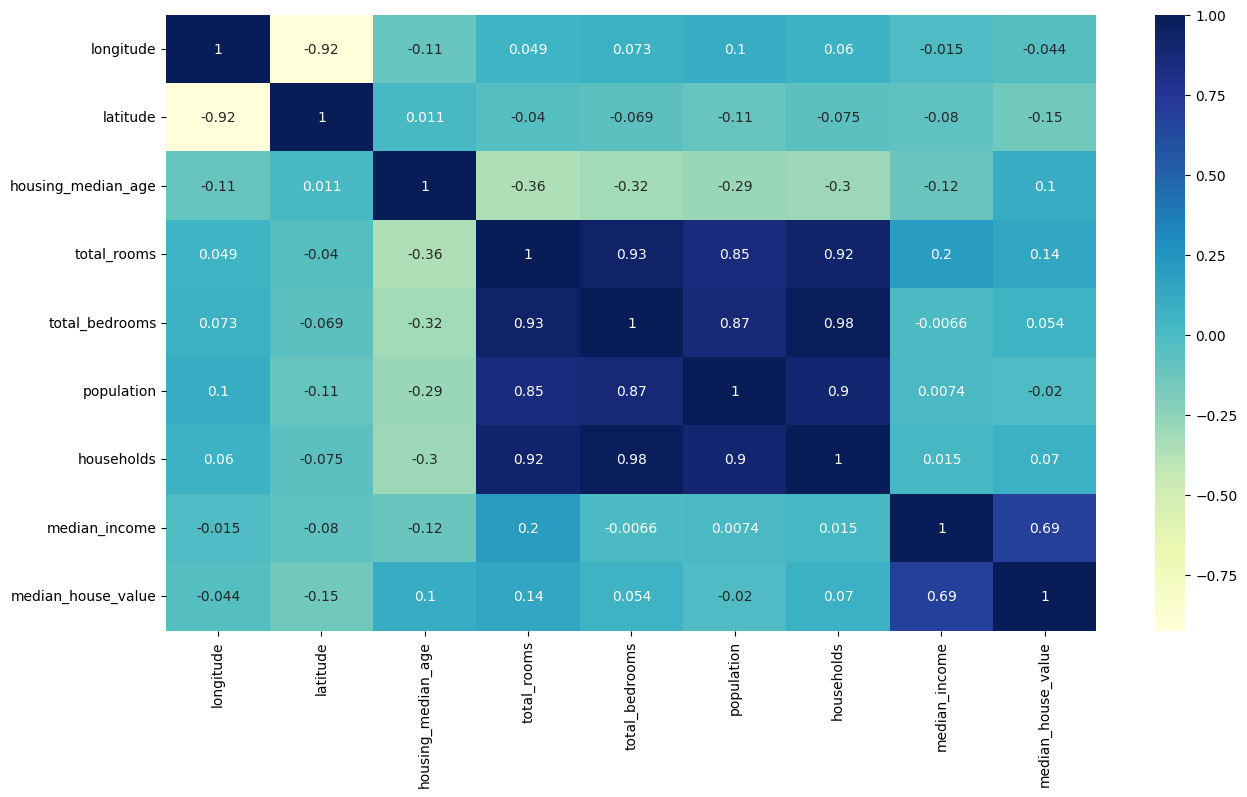

In [59]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(), annot = True, cmap ='YlGnBu')

In [60]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

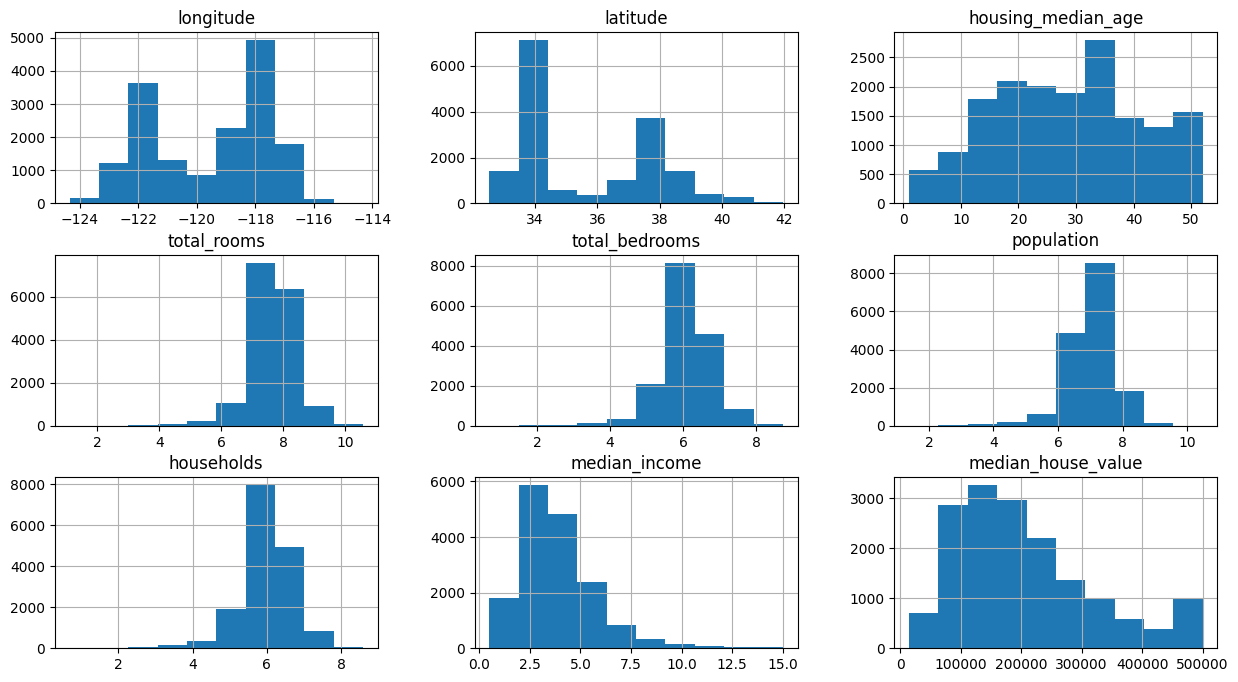

In [61]:

train_data.hist(figsize = (15, 8))

In [62]:
#data preprocessing
train_data.ocean_proximity.value_counts()


<1H OCEAN     7206
INLAND        5221
NEAR OCEAN    2097
NEAR BAY      1820
ISLAND           2
Name: ocean_proximity, dtype: int64

In [63]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)


In [64]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
11133,-117.93,33.85,36.0,7.672292,6.033086,6.919684,5.973810,3.2188,196900.0,1,0,0,0,0
2822,-119.04,35.41,20.0,8.092239,6.726233,7.392032,6.632002,1.3587,67500.0,0,1,0,0,0
10840,-117.93,33.65,26.0,8.671115,7.344073,8.463581,7.298445,3.1483,213000.0,1,0,0,0,0
18125,-122.03,37.33,23.0,8.348064,6.510258,7.486053,6.464588,7.4863,412300.0,1,0,0,0,0
12872,-121.35,38.70,5.0,9.576025,7.999679,8.937087,7.949091,3.5802,129600.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8294,-118.13,33.76,44.0,7.342132,6.139885,6.481577,6.008813,4.2500,439300.0,0,0,0,0,1
15202,-117.08,32.91,16.0,7.410952,5.433722,6.538140,5.416100,6.5853,248400.0,1,0,0,0,0
14966,-117.00,32.74,17.0,7.765569,6.396930,7.261225,6.236370,1.8856,118800.0,1,0,0,0,0
950,-121.93,37.72,26.0,7.939872,6.131226,7.282074,6.098074,4.9107,213800.0,1,0,0,0,0


<Axes: >

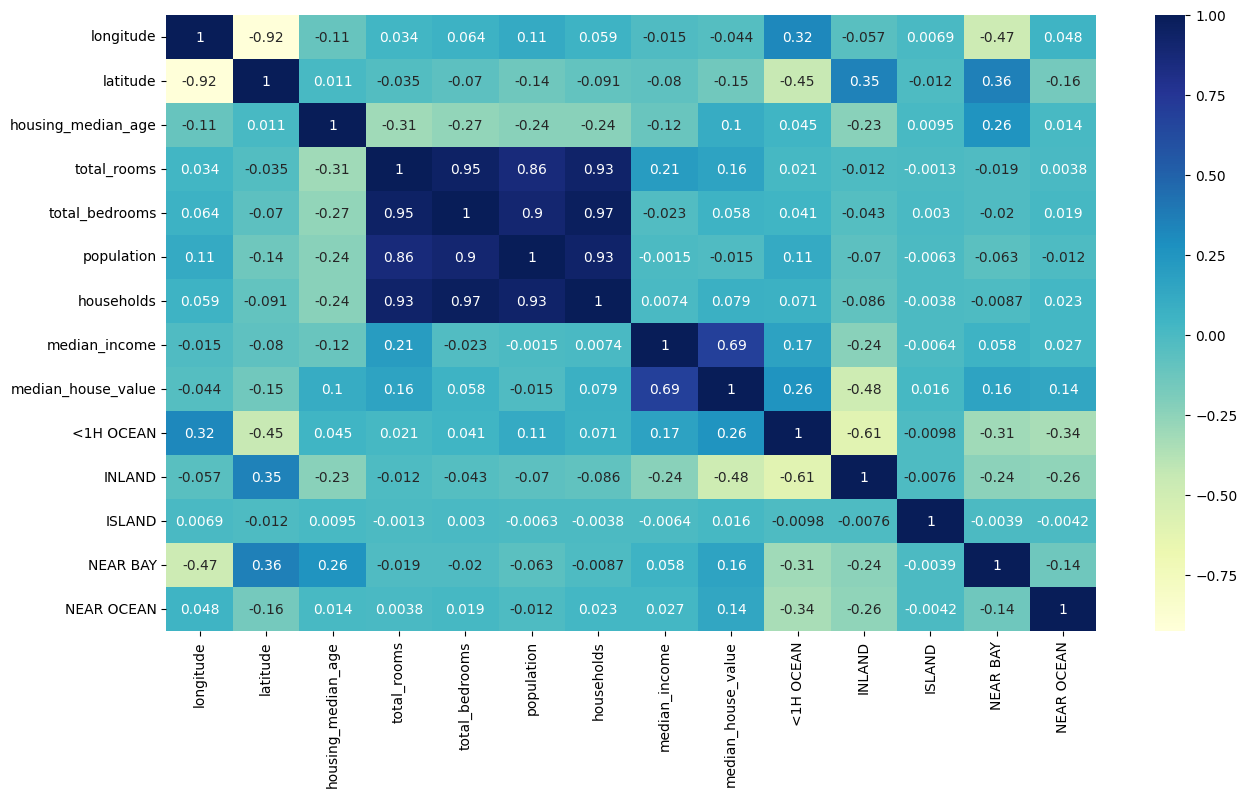

In [65]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(), annot = True, cmap ='YlGnBu')

In [66]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']


In [67]:
X_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [68]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']



In [69]:
X_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

In [70]:
reg.score(X_test, y_test)

0.6704218951446879

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the test set
y_pred = reg.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print('All the values are in USD')


Mean Absolute Error (MAE): 47461.89796937979
Mean Squared Error (MSE): 4273147337.1687093
Root Mean Squared Error (RMSE): 65369.31495104342
All the values are in USD


In [77]:
# Assuming binary classification based on a threshold
threshold = 200000  # You can adjust this threshold based on your problem

# Convert predictions to binary classes
y_pred_binary = (y_pred > threshold).astype(int)
y_test_binary = (y_test > threshold).astype(int)

# Calculate accuracy score
accuracy = metrics.accuracy_score(y_test_binary, y_pred_binary)

print(f'Accuracy Score: ' ,accuracy * 100, '%')


Accuracy Score:  82.35869831172009 %
